# Lab 2: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [3]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.ALL.list.v04r00.csv'
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/csv/ibtracs.ALL.list.v04r01.csv'
df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [4]:
len(df)

718367

How many North Atlantic hurricanes are in this dataset?

In [5]:
df_NA = df[df.BASIN=='NA']
len(df_NA)

126236

### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [6]:
df.BASIN.unique()

array(['NI', 'SI', 'NA', 'EP', 'WP', 'SP', 'SA'], dtype=object)

In [7]:
df.SUBBASIN.unique()

array(['BB', 'AS', 'MM', 'GM', 'NA', 'CS', 'WA', 'EA', 'CP'], dtype=object)

In [8]:
df.NATURE.unique()

array(['NR', 'TS', 'ET', 'MX', 'SS', 'DS'], dtype=object)

### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [9]:
df = df.rename(columns={'WMO_WIND':'WIND', 'WMO_PRESSURE':'PRES'})

In [10]:
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [11]:
df.nlargest(n=10, columns=['WIND'])

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,WMO_PRES
658946,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
658944,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
658948,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
421320,1980214N11330,1980,55,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
175293,1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
175294,1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
175296,1935241N23291,1935,45,NA,GM,UNNAMED,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
475882,1988253N12306,1988,73,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
545774,1997253N12255,1997,75,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
599042,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [12]:
df.groupby('SID').max().nlargest(10,  columns=['WIND'])

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,WMO_PRES
SID,,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-24 12:00:00,TS,23.2,-94.0,185.0,1007.0
1980214N11330,1980,55,NA,NA,ALLEN,1980-08-11 18:00:00,TS,28.9,-30.0,165.0,1010.0
1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-10 12:00:00,TS,57.0,-31.1,160.0,996.0
1988253N12306,1988,73,NA,NA,GILBERT,1988-09-20 00:00:00,TS,43.4,-54.0,160.0,1008.0
1997253N12255,1997,75,EP,MM,LINDA,1997-09-17 18:00:00,TS,23.5,-104.7,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,2005-10-26 18:00:00,TS,45.5,-52.0,160.0,1004.0
2019236N10314,2019,53,NA,NA,DORIAN,2019-09-09 00:00:00,TS,51.6,-46.4,160.0,1011.0
1998295N12284,1998,88,NA,NA,MITCH,1998-11-09 18:00:00,TS,63.5,-5.0,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,2005-09-26 06:00:00,TS,39.5,-69.9,155.0,1009.0


### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

In [13]:
df_grouped = df.groupby('SID').max().nlargest(20,  columns=['WIND'])

<Axes: xlabel='NAME'>

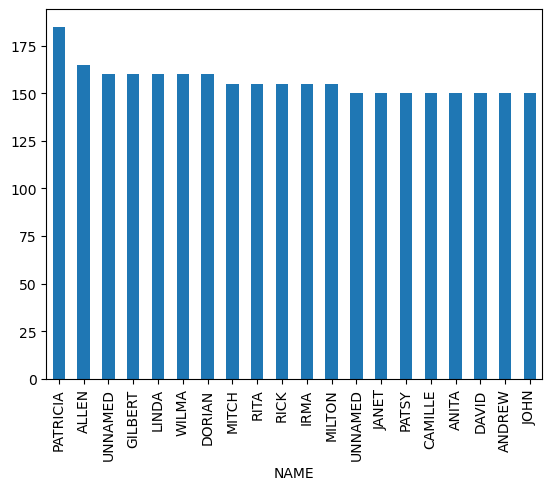

In [14]:
df_grouped.set_index('NAME').WIND.plot(kind='bar')

### 6) Plot the count of all datapoints by Basin

as a bar chart

<Axes: xlabel='BASIN'>

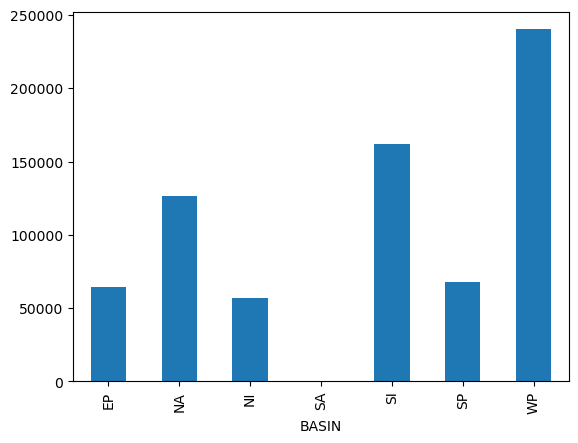

In [15]:
df.groupby('BASIN').count().NUMBER.plot(kind='bar')

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

<Axes: xlabel='BASIN'>

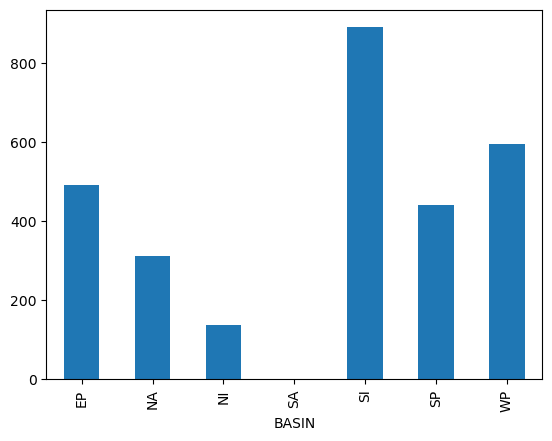

In [16]:
df.groupby('BASIN')['NAME'].nunique().plot(kind='bar')

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

<Axes: xlabel='LON', ylabel='LAT'>

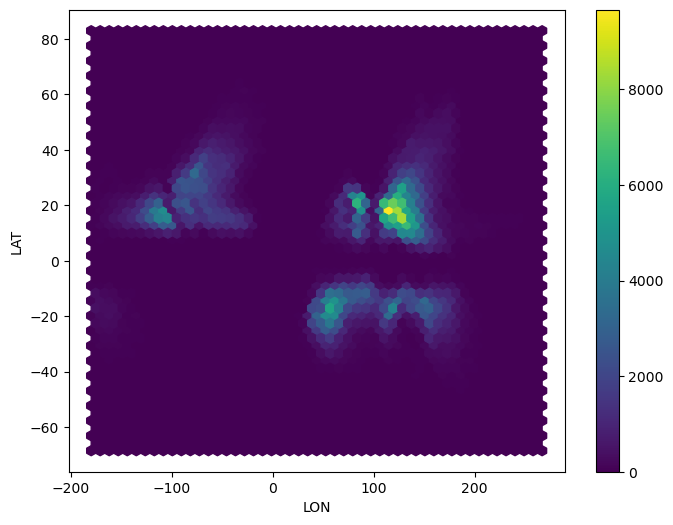

In [17]:
df.plot.hexbin(x='LON', y='LAT', gridsize=50, cmap='viridis', figsize=(8,6))

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [18]:
df_KATRINA = df[(df.NAME=='KATRINA') & (df.SEASON==2005)]

In [19]:
df_KATRINA['SID'].unique()

array(['2005236N23285'], dtype=object)

Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

<Axes: xlabel='LON', ylabel='LAT'>

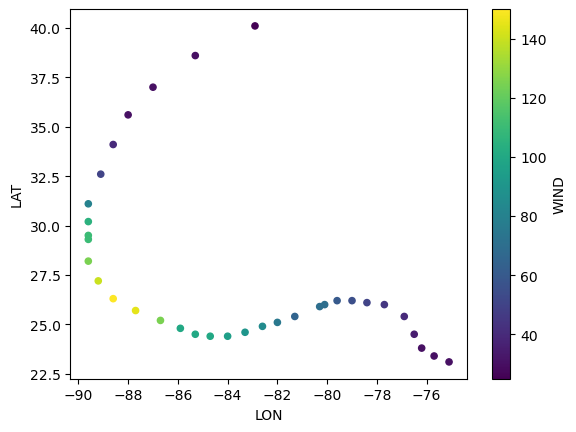

In [20]:
df_KATRINA.plot.scatter(x='LON', y='LAT', c='WIND')

### 10) Make time the index on your dataframe

In [21]:
df

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
718362,2025165N09276,2025,32,EP,MM,ERICK,2025-06-19 12:00:00,TS,16.4,-98.4,NaN,NaN
718363,2025165N09276,2025,32,EP,MM,ERICK,2025-06-19 15:00:00,TS,16.8,-98.8,NaN,NaN
718364,2025165N09276,2025,32,EP,MM,ERICK,2025-06-19 18:00:00,TS,17.2,-99.2,NaN,NaN
718365,2025165N09276,2025,32,EP,MM,ERICK,2025-06-19 21:00:00,TS,17.5,-99.7,NaN,NaN


In [22]:
df_timed = df.set_index('ISO_TIME')

### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

<Axes: xlabel='ISO_TIME'>

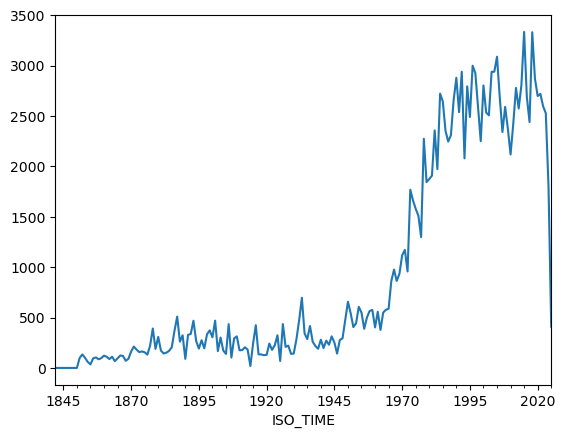

In [23]:
df_timed.WIND.resample('YE').count().plot()

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

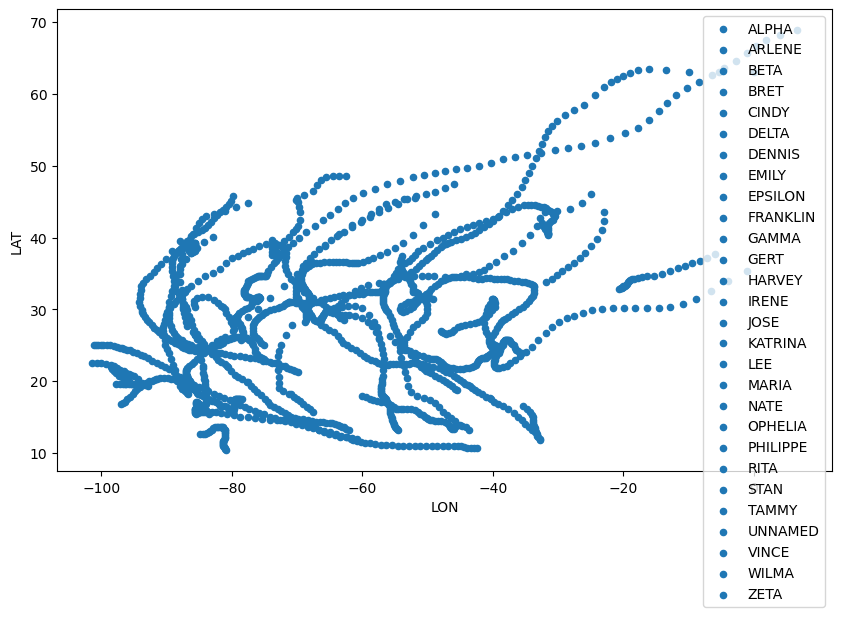

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))

for name, group in  df[ (df.BASIN=='NA') & (df.SEASON==2005)].groupby('NAME'):
    group.plot.scatter(x='LON', y='LAT', label=name, ax = ax)
plt.legend()

Hopefully at this point students have gotten an idea of what is going on and can do the rest on their own. 

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

Which years stand out as having anomalous hurricane activity?